# Image classification example

In [1]:
import torch.nn
import torch.optim

import openml_pytorch
import openml_pytorch.layers
import openml_pytorch.config
import openml
import logging
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore')

############################################################################
# Enable logging in order to observe the progress while running the example.
openml.config.logger.setLevel(logging.DEBUG)
openml_pytorch.config.logger.setLevel(logging.DEBUG)
############################################################################

############################################################################
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# openml.config.apikey = 'key'
from openml_pytorch.trainer import OpenMLTrainerModule
from openml_pytorch.trainer import OpenMLDataModule

In [3]:
from torchvision.transforms import Compose, Resize, ToPILImage, ToTensor, Lambda
from openml_pytorch.trainer import convert_to_rgb
transform = Compose(
    [
        ToPILImage(),  # Convert tensor to PIL Image to ensure PIL Image operations can be applied.
        Lambda(
            convert_to_rgb
        ),  # Convert PIL Image to RGB if it's not already.
        Resize(
            (128, 128)
        ),  # Resize the image.
        ToTensor(),  # Convert the PIL Image back to a tensor.
    ]
)

In [4]:
data_module = OpenMLDataModule(
    type_of_data="image",
    file_dir=openml.config.get_cache_directory() + "/datasets/45923/Images/",
    filename_col="Filename",
    target_mode="categorical",
    batch_size = 64,
    transform=transform
)

In [5]:
# Download the OpenML task for the Indoor scene classification.
task = openml.tasks.get_task(362070)

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(13456, 120)
        self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 19) # To user - Remember to set correct size of last layer. 
        self.fc3 = nn.Linear(84, 67) # To user - Remember to set correct size of last layer. 

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [7]:

trainer = OpenMLTrainerModule(
    data_module=data_module,
    verbose = True,
    epoch_count = 1,
    # optimizer_gen = torch.optim.AdamW
)
openml_pytorch.config.trainer = trainer

In [8]:
run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)

train: [4.032473855511685, tensor(0.0438, device='mps:0')]
valid: [3.9939096051763436, tensor(0.0451, device='mps:0')]
Loss tensor(4.0076, device='mps:0')


train: [4.037450145395368, tensor(0.0394, device='mps:0')]
valid: [3.991305126109645, tensor(0.0451, device='mps:0')]
Loss tensor(3.9900, device='mps:0')


train: [4.035374236422322, tensor(0.0419, device='mps:0')]
valid: [3.996943790487044, tensor(0.0451, device='mps:0')]
Loss tensor(4.0187, device='mps:0')


In [ ]:
trainer.learn.label_mapping

{0: 'airport_inside',
 1: 'artstudio',
 2: 'auditorium',
 3: 'bakery',
 4: 'bar',
 5: 'bathroom',
 6: 'bedroom',
 7: 'bookstore',
 8: 'bowling',
 9: 'buffet',
 10: 'casino',
 11: 'children_room',
 12: 'church_inside',
 13: 'classroom',
 14: 'cloister',
 15: 'closet',
 16: 'clothingstore',
 17: 'computerroom',
 18: 'concert_hall',
 19: 'corridor',
 20: 'deli',
 21: 'dentaloffice',
 22: 'dining_room',
 23: 'elevator',
 24: 'fastfood_restaurant',
 25: 'florist',
 26: 'gameroom',
 27: 'garage',
 28: 'greenhouse',
 29: 'grocerystore',
 30: 'gym',
 31: 'hairsalon',
 32: 'hospitalroom',
 33: 'inside_bus',
 34: 'inside_subway',
 35: 'jewelleryshop',
 36: 'kindergarden',
 37: 'kitchen',
 38: 'laboratorywet',
 39: 'laundromat',
 40: 'library',
 41: 'livingroom',
 42: 'lobby',
 43: 'locker_room',
 44: 'mall',
 45: 'meeting_room',
 46: 'movietheater',
 47: 'museum',
 48: 'nursery',
 49: 'office',
 50: 'operating_room',
 51: 'pantry',
 52: 'poolinside',
 53: 'prisoncell',
 54: 'restaurant',
 55: 'r

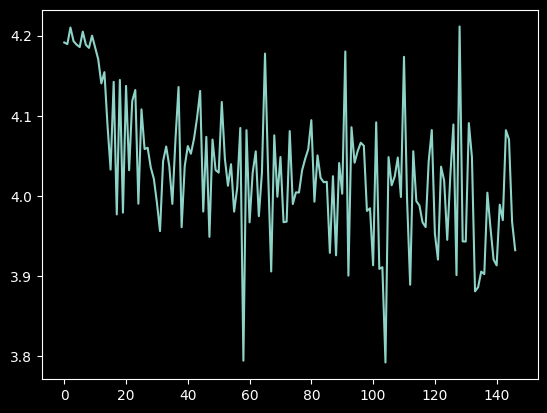

In [ ]:
trainer.runner.cbs[1].plot_loss()

# Pretrained Image classification example - ResNet18

In [ ]:
import torch.nn
import torch.optim

import openml
import openml_pytorch
import openml_pytorch.layers
import openml_pytorch.config
import logging
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore')

############################################################################
# Enable logging in order to observe the progress while running the example.
openml.config.logger.setLevel(logging.DEBUG)
openml_pytorch.config.logger.setLevel(logging.DEBUG)
############################################################################

############################################################################
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# openml.config.apikey = 'key'
from openml_pytorch.trainer import OpenMLTrainerModule
from openml_pytorch.trainer import OpenMLDataModule
from openml_pytorch.trainer import Callback

In [ ]:
from openml import OpenMLTask
def custom_optimizer_gen(model: torch.nn.Module, task: OpenMLTask) -> torch.optim.Optimizer:
    return torch.optim.Adam(model.fc.parameters())

############################################################################
# Download the OpenML task for Indoor scene classification.
task = openml.tasks.get_task(362070)

###########################################################################

data_module = OpenMLDataModule(
    type_of_data="image",
    file_dir=openml.config.get_cache_directory() + "/datasets/45923/Images/",
    # file_dir=openml.config.get_cache_directory()+'/datasets/44312/PNU_Micro/images/',
    # filename_col="FILE_NAME",
    filename_col="Filename",
    target_mode="categorical",
)


trainer = OpenMLTrainerModule(
    data_module=data_module,
    verbose = True,
    epoch_count = 1,
)
openml_pytorch.config.trainer = trainer

In [ ]:
# Example model. You can do better :)
import torchvision.models as models

# Load the pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Modify the last fully connected layer to the required number of classes
num_classes = 67
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

# Optional: If you're fine-tuning, you may want to freeze the pre-trained layers
# for param in model.parameters():
#     param.requires_grad = False

# # If you want to train the last layer only (the newly added layer)
# for param in model.fc.parameters():
#     param.requires_grad = True

In [ ]:
#
# Run the model on the task (requires an API key).m
run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)

In [ ]:
trainer.runner.cbs[1].plot_loss()

In [ ]:
trainer.runner.cbs[1].plot_lr()

# Pretrained Image classification example - Transformer

In [ ]:
import torch.nn
import torch.optim

import openml
import openml_pytorch
import openml_pytorch.layers
import openml_pytorch.config
import logging
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore')

############################################################################
# Enable logging in order to observe the progress while running the example.
openml.config.logger.setLevel(logging.DEBUG)
openml_pytorch.config.logger.setLevel(logging.DEBUG)
############################################################################

############################################################################
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# openml.config.apikey = 'key'
from openml_pytorch.trainer import OpenMLTrainerModule
from openml_pytorch.trainer import OpenMLDataModule
from openml_pytorch.trainer import Callback

In [ ]:
from openml import OpenMLTask
def custom_optimizer_gen(model: torch.nn.Module, task: OpenMLTask) -> torch.optim.Optimizer:
    return torch.optim.Adam(model.fc.parameters())

############################################################################
# Download the OpenML task for Indoor scene classification.
task = openml.tasks.get_task(362070)

###########################################################################

data_module = OpenMLDataModule(
    type_of_data="image",
    file_dir=openml.config.get_cache_directory() + "/datasets/45923/Images/",
    # file_dir=openml.config.get_cache_directory()+'/datasets/44312/PNU_Micro/images/',
    # filename_col="FILE_NAME",
    filename_col="Filename",
    target_mode="categorical",
)


trainer = OpenMLTrainerModule(
    data_module=data_module,
    verbose = True,
    epoch_count = 1,
)
openml_pytorch.config.trainer = trainer

In [ ]:
# Example model. You can do better :)
import torchvision.models as models

# Load the pre-trained ResNet model
model = models.efficientnet_b0(pretrained=True)

# Modify the last fully connected layer to the required number of classes
num_classes = 67
in_features = model.classifier[-1].in_features
# model.fc = nn.Linear(in_features, num_classes)
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features, num_classes),
)

# Optional: If you're fine-tuning, you may want to freeze the pre-trained layers
# for param in model.parameters():
#     param.requires_grad = False

# # If you want to train the last layer only (the newly added layer)
# for param in model.fc.parameters():
#     param.requires_grad = True

In [ ]:
#
# Run the model on the task (requires an API key).m
run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)

In [ ]:
trainer.runner.cbs[1].plot_loss()

In [ ]:
trainer.runner.cbs[1].plot_lr()

# Sequential classification (Unsupported for now)

In [2]:

import torch.nn
import torch.optim

import openml
import openml_pytorch
import openml_pytorch.layers
import openml_pytorch.config
import logging


############################################################################
# Enable logging in order to observe the progress while running the example.
openml.config.logger.setLevel(logging.DEBUG)
openml_pytorch.config.logger.setLevel(logging.DEBUG)
############################################################################

In [3]:
from openml_pytorch.trainer import OpenMLTrainerModule
from openml_pytorch.trainer import OpenMLDataModule
from openml_pytorch.trainer import Callback

In [4]:

############################################################################
# Define a sequential network that does the initial image reshaping
# and normalization model.
processing_net = torch.nn.Sequential(
    openml_pytorch.layers.Functional(function=torch.Tensor.reshape,
                                                shape=(-1, 1, 28, 28)),
    torch.nn.BatchNorm2d(num_features=1)
)
############################################################################

############################################################################
# Define a sequential network that does the extracts the features from the
# image.
features_net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
    torch.nn.LeakyReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
    torch.nn.LeakyReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
)
############################################################################

############################################################################
# Define a sequential network that flattens the features and compiles the
# results into probabilities for each digit.
results_net = torch.nn.Sequential(
    openml_pytorch.layers.Functional(function=torch.Tensor.reshape,
                                                shape=(-1, 4 * 4 * 64)),
    torch.nn.Linear(in_features=4 * 4 * 64, out_features=256),
    torch.nn.LeakyReLU(),
    torch.nn.Dropout(),
    torch.nn.Linear(in_features=256, out_features=10),
)
############################################################################
# openml.config.apikey = 'key'

############################################################################
# The main network, composed of the above specified networks.
model = torch.nn.Sequential(
    processing_net,
    features_net,
    results_net
)
############################################################################


In [5]:
data_module = OpenMLDataModule(
    type_of_data="dataframe",
    # file_dir=openml.config.get_cache_directory() + "/datasets/45923/Images/",
    # file_dir=openml.config.get_cache_directory()+'/datasets/44312/PNU_Micro/images/',
    # filename_col="FILE_NAME",
    filename_col="class",
    target_mode="categorical",
)

In [6]:

trainer = OpenMLTrainerModule(
    data_module=data_module,
    verbose = True,
    epoch_count = 1,
)
openml_pytorch.config.trainer = trainer

In [7]:
# Download the OpenML task for the mnist 784 dataset.
task = openml.tasks.get_task(3573)

/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3577: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)


In [8]:
run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)

/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.3794583264440035, tensor(0.8780, device='mps:0')]
valid: [0.05794684031653026, tensor(0.9821, device='mps:0')]
Loss tensor(0.0272, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  openml.datasets.get_dataset(task.dataset_id).name,
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get

train: [0.3266011835868607, tensor(0.8978, device='mps:0')]
valid: [0.06580412849547371, tensor(0.9810, device='mps:0')]
Loss tensor(0.1459, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.3122503306878307, tensor(0.9038, device='mps:0')]
valid: [0.05418220641121032, tensor(0.9848, device='mps:0')]
Loss tensor(0.3097, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)


train: [0.29128175981040566, tensor(0.9140, device='mps:0')]
valid: [0.06442174033513144, tensor(0.9814, device='mps:0')]
Loss tensor(0.2121, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  openml.datasets.get_dataset(task.dataset_id).name,
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get

train: [0.33833195546737216, tensor(0.8941, device='mps:0')]
valid: [0.07415963793557788, tensor(0.9781, device='mps:0')]
Loss tensor(0.2433, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.31920755483906527, tensor(0.9017, device='mps:0')]
valid: [0.060344010610429065, tensor(0.9819, device='mps:0')]
Loss tensor(0.0028, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.3858281318893298, tensor(0.8777, device='mps:0')]
valid: [0.08394458589099703, tensor(0.9767, device='mps:0')]
Loss tensor(0.0008, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.3232338858575838, tensor(0.8987, device='mps:0')]
valid: [0.06324217296781993, tensor(0.9817, device='mps:0')]
Loss tensor(0.0018, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.3881790812389771, tensor(0.8771, device='mps:0')]
valid: [0.0873627677796379, tensor(0.9751, device='mps:0')]
Loss tensor(0.1342, device='mps:0')


train: [0.35279786017416226, tensor(0.8908, device='mps:0')]
valid: [0.06580494229755704, tensor(0.9832, device='mps:0')]
Loss tensor(0.2662, device='mps:0')


AssertionError: 